In this excerise we examine a function crucial to the proof-of-work process in Bitcoin, the SHA-256 function.  SHA-256 is a one-way hashing function, that is, given a number A, the function will produce a number B, but given number B, there is (currently) no way to determine number A (without trying all possible numbers from 0 to $2^{256}$).

Try it yourself.  Assign a value to X, and see what number you get out!

In [2]:
from hashlib import sha256
X = 3
hashedWord = sha256(X.to_bytes(16,'little'));
print(int(hashedWord.hexdigest(),16))

40633220138203801386340889173474153446824339667164658763744281150300668007358


If you only tried one number, change the value of X and try it again.  You'll see that a very small change produces a very different number.

Next, let's see if numbers that are hashed are evenly distributed.  Trying 100,000 numbers by hand would take a long time, so let's use a loop.

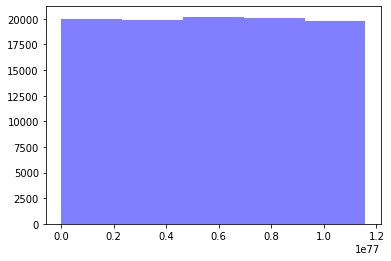

In [4]:
import matplotlib.pyplot as plt

x = []
for i in range(0,100000):    
    hashobj = sha256(i.to_bytes(16,'little'))
    val_hex = hashobj.hexdigest()
    val_int = int(val_hex, 16)
    x.append(val_int / 1)
    
#plot a historgram of number of attempts for each case
num_bins = 5
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()


So, if you pick a number, it has an equal likelihood of being any other number in the range 0 to $2^{256}$.  The Bitcoin proof-of-work process has an adjustable difficulty based on the current amount of mining, so a Bitcoin miner's job is to find a number called, in this context, a _nonce_ to add to A to get a resulting B less than the difficulty value.  We will set our difficulty value at $2^{253}$.  Try out a few numbers by changing the value of X and see if you can find one that hashes to less than $2^{253}$!

In [5]:
from hashlib import sha256
import matplotlib.pyplot as plt

X = 0
hashedWord = sha256(X.to_bytes(16,'little'));
val_hex = hashedWord.hexdigest()
val_int = int(val_hex, 16)

power=253
print("Your value: " + str(val_int))
print("Difficulty: " + str(2**power))
if( val_int < 2**power):
    print( "SHA256(" + str(X) + ") is less than 2^" + str(power) + "!")
else:
    print( "SHA256(" + str(X) + ") is not less than 2^" + str(power) + ".")

Your value: 25002714928494966271747975156357681692251132181234715675664020813905482495931
Difficulty: 14474011154664524427946373126085988481658748083205070504932198000989141204992
SHA256(0) is not less than 2^253.


I bet it took you several attempts to find a number that generate a value less than $2^{253}$.  Let's use a loop again to see how many attempts it takes to find a nonce for a random number to get a value less than $2^{250}$.  This may take a few seconds to run.

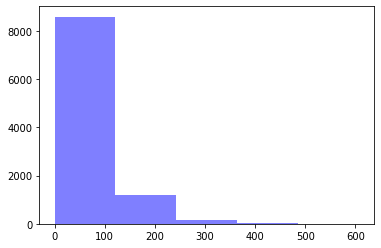

In [6]:
from hashlib import sha256
import matplotlib.pyplot as plt
import random 
difficulty = 2**250
x = []

for i in range(0,10000):
    counter = 0
    startingValue = 2**32
    startingValue *= random.random() #linear, I think?
    startingValue = int(startingValue)
    while True:
        hashobj = sha256(startingValue.to_bytes(16,'little')) #is sha-256 linear?
        val_hex = hashobj.hexdigest()
        val_int = int(val_hex, 16)
        if( val_int < difficulty):
            break    
        counter += 1
        startingValue += 1
    x.append(counter)
    
#plot a historgram of number of attempts for each case
num_bins = 5
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()



    

You can see from this plot that most of the attempts took between 0 and 100 tries to find a valid nonce, but some took much longer.  The current difficulty is around $2^{180}$, or around one sextillion times more difficult than what we just attempted.  It takes all the Bitcoin miners, in all the world approximately 10 minutes to find the correct nonce.